In [1]:
import numpy as np
np.random.seed(123)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

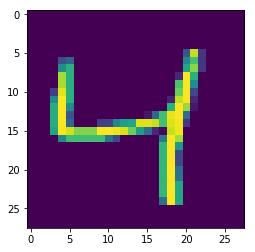

In [4]:
plt.imshow(X_train[2])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [8]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [12]:
model.fit(X_train, Y_train, batch_size = 32, nb_epoch = 10, verbose = 1)

Instructions for updating:
Use tf.cast instead.


c:\users\saibi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 49s 823us/step - loss: 0.2110 - acc: 0.9355
Epoch 2/10
60000/60000 [==============================] - 49s 819us/step - loss: 0.0896 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 49s 822us/step - loss: 0.0675 - acc: 0.9803
Epoch 4/10
60000/60000 [==============================] - 49s 821us/step - loss: 0.0568 - acc: 0.9823
Epoch 5/10
60000/60000 [==============================] - 49s 824us/step - loss: 0.0476 - acc: 0.9853
Epoch 6/10
60000/60000 [==============================] - 49s 822us/step - loss: 0.0440 - acc: 0.9869
Epoch 7/10
60000/60000 [==============================] - 49s 821us/step - loss: 0.0374 - acc: 0.9881
Epoch 8/10
60000/60000 [==============================] - 49s 821us/step - loss: 0.0347 - acc: 0.9889
Epoch 9/10
60000/60000 [==============================] - 50s 825us/step - loss: 0.0321 - acc: 0.9900
Epoch 10/10
60000/60000 [==============================] - 50s 826us/step - loss: 

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
score

[0.033560457713900725, 0.9904]